In [2]:
from koogu.data import preprocess, feeder
from koogu.model import architectures
from koogu import train, assessments, recognize

from matplotlib import pyplot as plt           # used for plotting graphs


In [3]:
# List class-specific subdirectories to process
class_dirs = ['Gibbons', 'Noise']

# Path to the directory where pre-processed data will be written.
# Directory will be created if it doesn't exist.
prepared_audio_dir = '/Volumes/DJC Files/Benchmarking_MS_Data/benchmarking_zenodo/data/AcousticData/Jahoo_trainingdata_manual_annotations/'

data_settings = {
    # Settings for handling raw audio
    'audio_settings': {
        'clip_length': 12.0,
        'clip_advance': 0.4,
        'desired_fs': 32000
    },

    # Settings for converting audio to a time-frequency representation
    'spec_settings': {
        'win_len': 0.128,
        'win_overlap_prc': 0.75,
        'bandwidth_clip': [500, 3000]
    }
}

# Convert audio files into prepared data
clip_counts = preprocess.from_top_level_dirs(
    data_settings['audio_settings'],
    class_dirs=class_dirs,
    audio_root=prepared_audio_dir,
    output_root='/Users/denaclink/Desktop/VSCodeRepos/BEANS/data/',
    negative_class_label='Noise')

print(clip_counts)

preprocess:: Warning: Output directory /Users/denaclink/Desktop/VSCodeRepos/BEANS/data/ already exists. Contents may get overwritten. CAUTION: Stale files within the directory could lead to corruption of training inputs.


{'Gibbons': 213, 'Noise': 2130}


In [4]:
prepared_audio_dir = '/Users/denaclink/Desktop/VSCodeRepos/BEANS/data/'

data_feeder = feeder.SpectralDataFeeder(
    prepared_audio_dir,                        # where the prepared clips are at
    data_settings['audio_settings']['desired_fs'],
    data_settings['spec_settings'],
    validation_split=0.3,                     # set aside 30% for validation
    max_clips_per_class=20000                  # use up to 20k inputs per class
)

print(data_feeder)

Data: 2 classes, 1640 training & 703 eval samples
Model: "DenseNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 321, 372)]           0         []                            
                                                                                                  
 tf.expand_dims (TFOpLambda  (None, 321, 372, 1)          0         ['input_1[0][0]']             
 )                                                                                                
                                                                                                  
 Pre_Conv (Conv2D)           (None, 321, 372, 16)         144       ['tf.expand_dims[0][0]']      
                                                                                                  
 B1_CF1_BatchNorm (BatchNor  (None, 321, 

INFO:tensorflow:Assets written to: /Volumes/DJC Files/Benchmarking_MS_Data/benchmarking_zenodo/results/koogu_updated/binary/koogu/assets


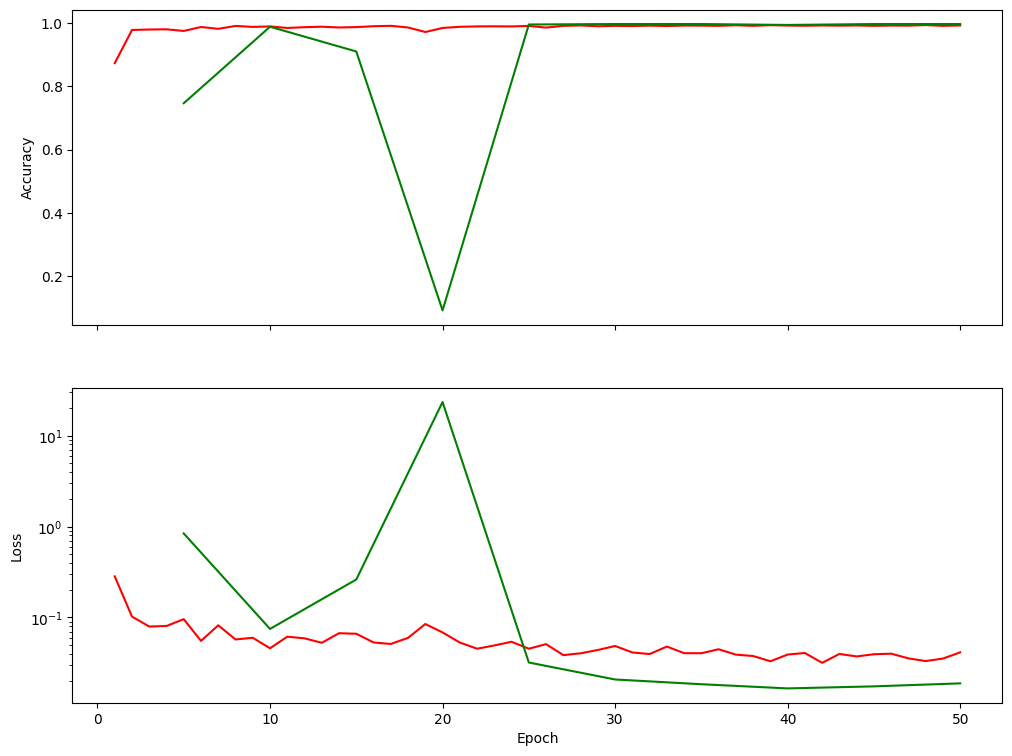

In [5]:
model = architectures.DenseNet(
    [4, 4, 4],                                 # 3 dense-blocks, 4 layers each
    preproc=[ ('Conv2D', {'filters': 16}) ],   # Add a 16-filter pre-conv layer
    dense_layers=[32]                          # End with a 32-node dense layer
)

# Settings that control the training process
training_settings = {
    'batch_size': 64,
    'epochs': 50,                              # run for 50 epochs

    # Start with a learning rate of 0.01, and drop it to a tenth of its value,
    # successively, at epochs 20 & 40.
    'learning_rate': 0.01,
    'lr_change_at_epochs': [20, 40],
    'lr_update_factors': [1.0, 1e-1, 1e-2],    # up to 20, beyond 20, beyond 40

    'dropout_rate': 0.05                       # Helps model generalize better
}

# Path to the directory where model files will be written
model_dir = '/Volumes/DJC Files/Benchmarking_MS_Data/benchmarking_zenodo/results/koogu_updated/binary/'

# Perform training
history = train(
    data_feeder,
    model_dir,
    data_settings,
    model,
    training_settings
)

# Plot training & validation history
fig, ax = plt.subplots(2, sharex=True, figsize=(12, 9))
ax[0].plot(
    history['train_epochs'], history['binary_accuracy'], 'r',
    history['eval_epochs'], history['val_binary_accuracy'], 'g')
ax[0].set_ylabel('Accuracy')
ax[1].plot(
    history['train_epochs'], history['loss'], 'r',
    history['eval_epochs'], history['val_loss'], 'g')
ax[1].set_yscale('log')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
from koogu import recognize

# Path to a single audio file or to a directory (can contain subdirectories)
test_audio_root = '//Volumes/DJC Files/Benchmarking_MS_Data/benchmarking_zenodo/data/AcousticData/Jahoo_testdata_clips/ImagesIgnoreWindowsWavs/'

# Output directory
raw_detections_root = '/Volumes/DJC Files/Benchmarking_MS_Data/benchmarking_zenodo/results/koogu_updated/binary/detections/'

recognize(
  model_dir='/Volumes/DJC Files/Benchmarking_MS_Data/benchmarking_zenodo/results/koogu_updated/binary/',
  audio_root=test_audio_root,
  raw_detections_dir=raw_detections_root,
  batch_size=64,    # Increasing this may improve speed on computers having higher resources
  recursive=True,   # Process subdirectories also
  show_progress=True
)

tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_2935.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_2971.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3019.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3091.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3157.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3211.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3271.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3331.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3391.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3457.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1048_WA_20220812_050002_3523.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1052_WA_20221111_050002_3049.wav |██████████| 100.0% 
tedGibbons/CrestedGibbons_R1